In [146]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv('data/insurance-2.csv')
data.head()

sexUn = data['sex'].unique() # преобразование каждого признака в числовой
smokerUn = data['smoker'].unique()
regionUn = data['region'].unique()

for i in range(len(sexUn)):
    data['sex'] = data['sex'].replace(sexUn[i], i)

for i in range(len(smokerUn)):
    data['smoker'] = data['smoker'].replace(smokerUn[i], i)

for i in range(len(regionUn)):
    data['region'] = data['region'].replace(regionUn[i], i)

data = data.drop('index', axis=1)

X = data
X = data.drop('charges', axis=1)
y = data.charges

X_numpy = X.to_numpy()
y_numpy = y.to_numpy()


scaler = StandardScaler()
X_numpy = scaler.fit_transform(X_numpy)
y_numpy = scaler.fit_transform(y_numpy.reshape(-1,1))

In [156]:
print(pd.DataFrame(X_numpy))

             0         1         2         3         4         5
0    -1.438764 -1.010519 -0.453320 -0.908614 -1.970587 -1.343905
1    -1.509965  0.989591  0.509621 -0.078767  0.507463 -0.438495
2    -0.797954  0.989591  0.383307  1.580926  0.507463 -0.438495
3    -0.441948  0.989591 -1.305531 -0.908614  0.507463  0.466915
4    -0.513149  0.989591 -0.292556 -0.908614  0.507463  0.466915
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.466915
1334 -1.509965 -1.010519  0.206139 -0.908614  0.507463  1.372326
1335 -1.509965 -1.010519  1.014878 -0.908614  0.507463 -0.438495
1336 -1.296362 -1.010519 -0.797813 -0.908614  0.507463 -1.343905
1337  1.551686 -1.010519 -0.261388 -0.908614 -1.970587  0.466915

[1338 rows x 6 columns]


In [157]:
# X_numpy, y_numpy = datasets.make_regression(n_samples=1000, n_features=2, noise=20, random_state=12)

epoch: 10, loss = 1.2838
epoch: 20, loss = 1.2626
epoch: 30, loss = 1.2416
epoch: 40, loss = 1.2207
epoch: 50, loss = 1.2000
epoch: 60, loss = 1.1795
epoch: 70, loss = 1.1594
epoch: 80, loss = 1.1396
epoch: 90, loss = 1.1202
epoch: 100, loss = 1.1013
epoch: 110, loss = 1.0829
epoch: 120, loss = 1.0650
epoch: 130, loss = 1.0477
epoch: 140, loss = 1.0310
epoch: 150, loss = 1.0148
epoch: 160, loss = 0.9993
epoch: 170, loss = 0.9844
epoch: 180, loss = 0.9701
epoch: 190, loss = 0.9564
epoch: 200, loss = 0.9433
epoch: 210, loss = 0.9308
epoch: 220, loss = 0.9188
epoch: 230, loss = 0.9075
epoch: 240, loss = 0.8966
epoch: 250, loss = 0.8863
epoch: 260, loss = 0.8764
epoch: 270, loss = 0.8670
epoch: 280, loss = 0.8581
epoch: 290, loss = 0.8496
epoch: 300, loss = 0.8415
epoch: 310, loss = 0.8337
epoch: 320, loss = 0.8264
epoch: 330, loss = 0.8193
epoch: 340, loss = 0.8126
epoch: 350, loss = 0.8062
epoch: 360, loss = 0.8001
epoch: 370, loss = 0.7943
epoch: 380, loss = 0.7887
epoch: 390, loss = 0.

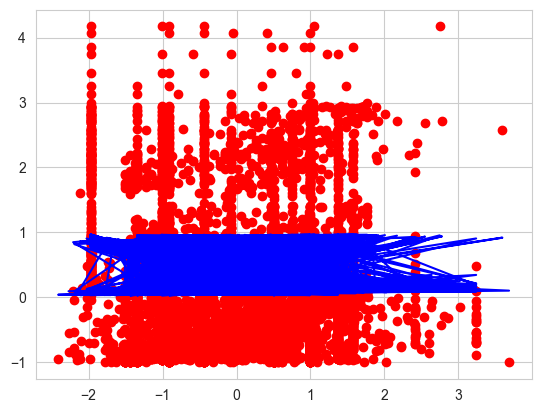

In [162]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

input_size = 6
output_size = 1
model = nn.Sequential(
    nn.Linear(input_size, output_size),
    nn.Sigmoid()
)

learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 1000
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()

# plt.plot(X_numpy, y_numpy, 'ro')
# plt.plot(X_numpy, predicted, 'b')
# plt.show()

In [159]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions =  model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [161]:
input, target = X[20], y[20]
predict_single(input, target, model)

Input: tensor([ 1.4805, -1.0105,  0.8763, -0.9086,  0.5075,  1.3723])
Target: tensor([-0.0034])
Prediction: tensor([0.2735])
